In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import io
from scipy import linalg
from scipy import optimize
from numpy.polynomial.polynomial import polyvander
from numpy.polynomial.polynomial import polyval
import seaborn as sns

fs=24
lw=4

rms = lambda x: np.sqrt(np.mean(np.square(x))) 

# Problem 4

Generate a random 20 × 10 matrix A and vector b ∈ R20, and compute x-hat = A†b.

Run the Richardson algorithm with µ = 1/∥A∥^2 for 500 iterations, and plot ∥x(k) − xˆ∥^2 to verify that x(k) is converging to x-hat.

Just include your error plots. Plot on both a linear and log-scale. 

To get the log-scale you can use plt.yscale(’log’). Include a snap shot of your code in your homework pdf. You can print your python notebook to a pdf.

Text(0.5, 1.0, 'Richardson Algorithm Run 500 times with Random Matrix and Vector')

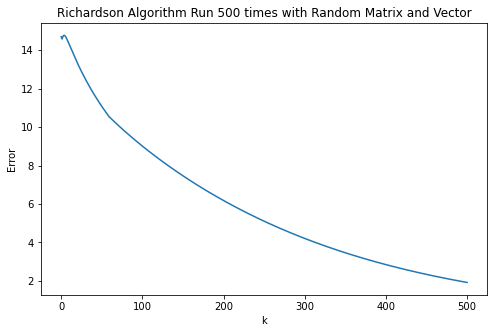

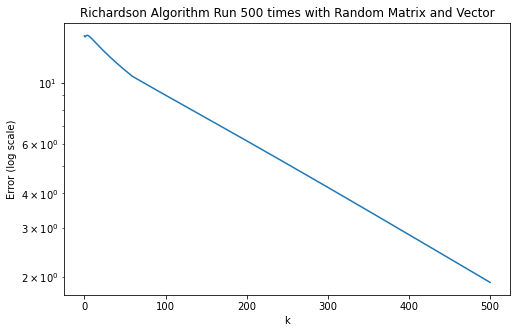

In [8]:
A = np.random.rand(20, 10)
b = np.random.rand(20, 1)
#get expected x-hat val to compare
xhat = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matrix.transpose(A), A)), np.matrix.transpose(A)), b)

#initial val is 0 arr
xvals = []
x1 = np.zeros(10).reshape(10, 1)
xvals.append(x1)
index = 1
mu = 1/((np.linalg.norm(A, 1))**2)
#run the algorithm iter imes
iter = 500
for i in range(iter):
    prev = xvals[i]
    at = np.matrix.transpose(A)
    ax = np.matmul(A, prev)
    axb = np.subtract(ax, b)
    at = at*mu
    axbt = np.matmul(at, axb)
    res = np.subtract(xvals[i], axbt)
    xvals.append(res)
    
difs = []
for i in range(len(xvals)):
    dif = np.subtract(xvals[i], xhat)
    norm = (np.linalg.norm(dif, 1))**2
    difs.append(norm)

plt.figure(figsize=(8,5))
plt.plot(range(len(difs)), difs)
plt.ylabel("Error")
plt.xlabel("k")
plt.title("Richardson Algorithm Run " + str(iter) + " times with Random Matrix and Vector")

plt.figure(figsize=(8,5))
plt.yscale('log')
plt.plot(range(len(difs)), difs)
plt.ylabel("Error (log scale)")
plt.xlabel("k")
plt.title("Richardson Algorithm Run " + str(iter) + " times with Random Matrix and Vector")

# Problem 5

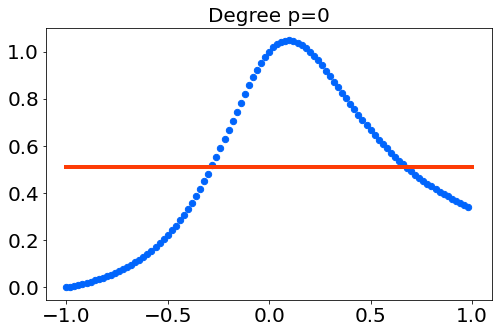

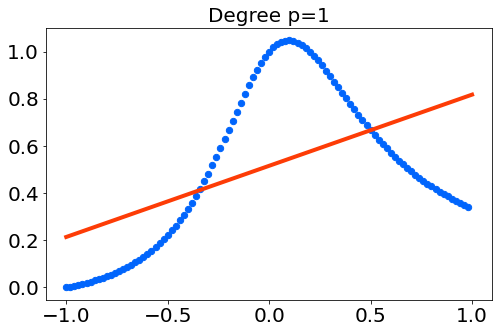

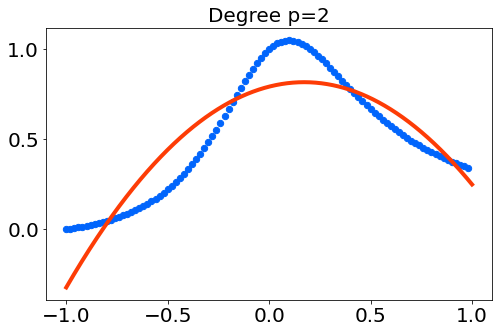

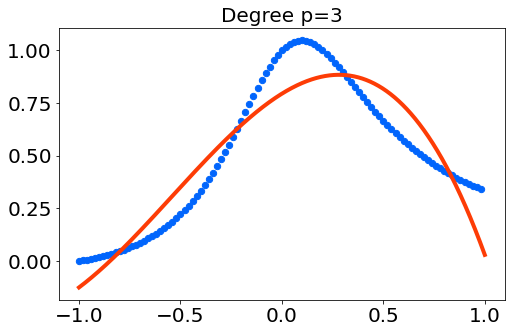

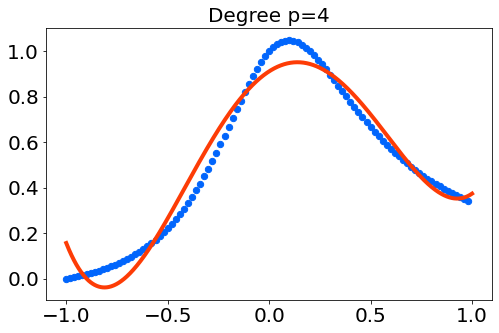

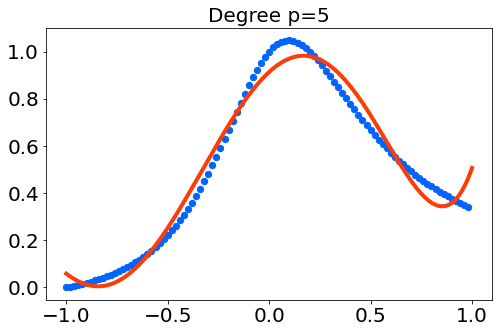

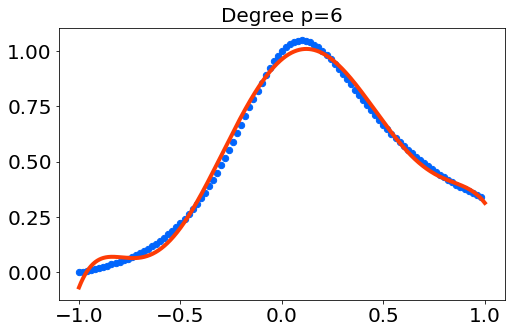

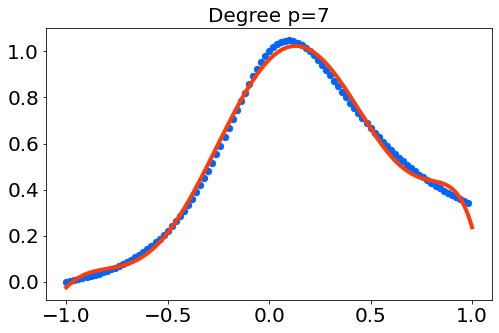

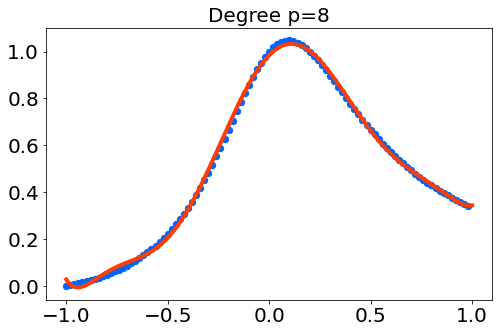

In [9]:
#Part A
#Setting up polynomial
np.random.seed(19)
eps=np.random.rand(100)
m = 100
i = 100
x = np.arange(-1, 1, 2/i)
y = np.zeros(i)
for i in range(100):
    y[i] = (1+x[i])/(1+5*x[i]**2)

#plotting different degrees
theta = []
eval_theta = []
As = []
tlin=np.linspace(-1,1, 1000)
for p in range(9):
    As.append(polyvander(x.flatten(),p))
    theta.append(np.linalg.inv(As[-1].T@As[-1])@As[-1].T@y)
    eval_theta.append(As[-1]@theta[-1])
    plt.figure(figsize=(8,5))
    plt.scatter(x,y, s=40, color='xkcd:bright blue')
    A=polyvander(tlin.flatten(),p)
    plt.plot(tlin, A@theta[-1], linewidth=lw, color='xkcd:red orange')
    plt.tick_params(labelsize=fs-4)
    plt.title('Degree p={}'.format(p), fontsize=fs-4)

This tells us the reasonable degree fit is around 4-6, as the least difference in degree between train and test occurs among those values


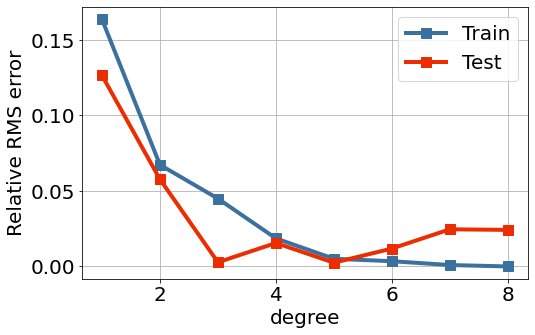

In [11]:
#Part B
u = np.arange(-1.1, 1.1, 2.2/10)
v = np.zeros(10)
for i in range(len(v)):
    v[i] = (1+u[i])/(1+5*u[i]**2)
    
m_train = 100
MAXORDER=8
t=-1+2*np.random.rand(m_train,1)
y_train=(1+t)/(1+5*t**2)*np.random.rand(m_train,1)
m_test = 10
t_test = -1 + 2*np.random.rand(m_test,1)
y_test = (1+t_test)/(1+5*t_test**2) + 0.025*np.random.randn(m_test,1)

error_train = np.zeros(MAXORDER)
error_test = np.zeros(MAXORDER)
for p in range(0,MAXORDER):
    A = polyvander(t.flatten(),p+1)
    theta = np.linalg.inv(A.T@A)@A.T@y_train
    error_train[p] = np.linalg.norm(A@theta - y_train) / np.linalg.norm(y_train)
    error_test[p] = np.linalg.norm( polyvander(t_test.flatten(), p+1) @ theta - y_test) / np.linalg.norm(y_test)

amin = np.amin(error_train)  
error_train = error_train-amin
error_test = error_test-amin
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(range(1,MAXORDER+1), error_train, label = "Train", marker ='s', markersize=10,linewidth=lw, color='xkcd:muted blue')
plt.plot(range(1,MAXORDER+1), error_test, label = "Test", marker ='s', markersize=10,linewidth=lw, color='xkcd:tomato red')
plt.legend(fontsize=fs-4)
plt.tick_params(labelsize=fs-4)
plt.xlabel('degree', fontsize=fs-4)
plt.ylabel('Relative RMS error', fontsize=fs-4)


print("This tells us the reasonable degree fit is around 4-6, as the least difference in degree between train and test occurs among those values")

# Problem 8

Degree 0, Error: 0.0
Degree 1, Error: 55.00000000000001
Degree 2, Error: 55.00000000000001
Degree 3, Error: 49.5
Degree 4, Error: 55.00000000000001
Degree 5, Error: 55.00000000000001
Degree 6, Error: 55.00000000000001
Degree 7, Error: 55.00000000000001
Degree 8, Error: 55.00000000000001


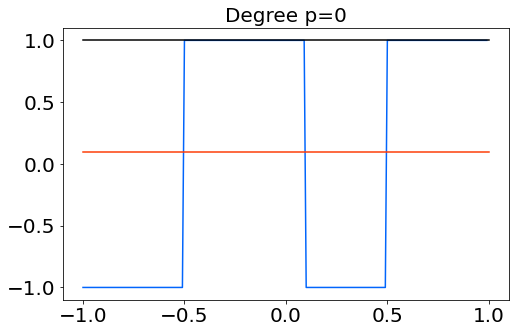

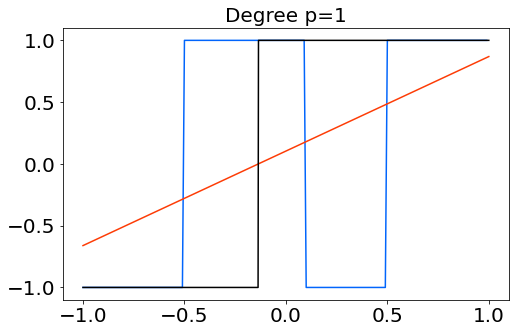

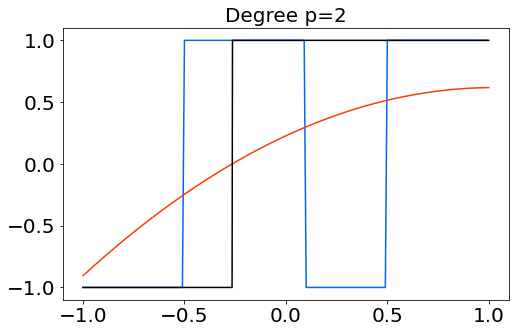

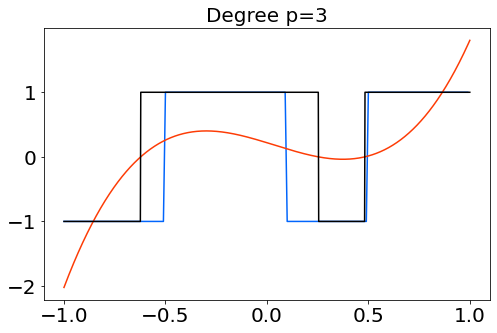

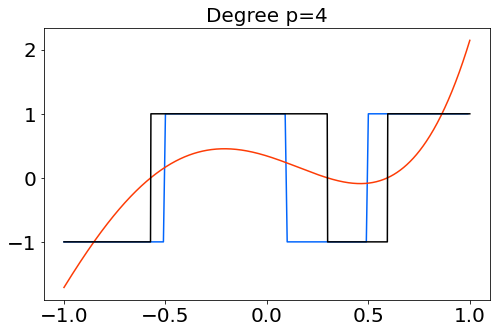

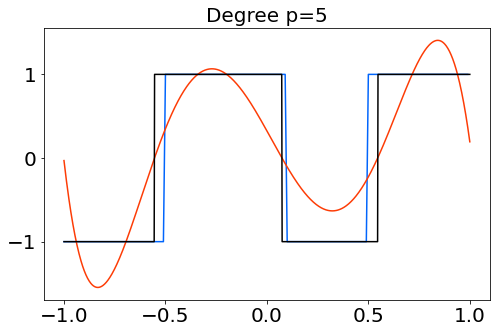

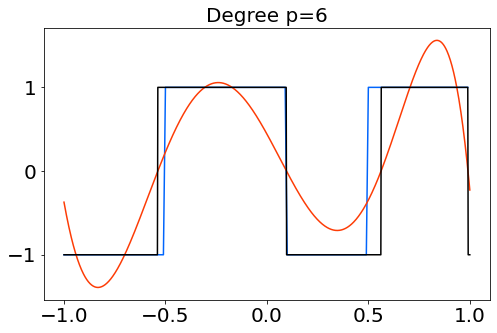

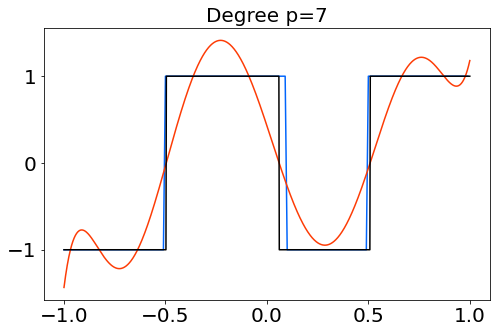

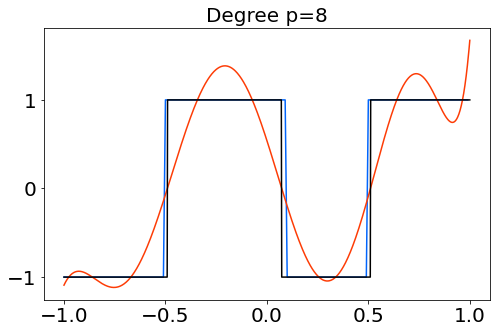

In [150]:
#Functions used later
numTP = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == True and yhat[i] == True])
numFN = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == True and yhat[i] == False])
numFP = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == False and yhat[i] == True])
numTN = lambda y,yhat: sum([1 for i in range(len(y)) if y[i] == False and yhat[i] == False]) 
confusion_matrix = lambda y,yhat: np.vstack([[numTP(y,yhat),numFN(y,yhat)],[numFP(y,yhat),numTN(y,yhat)]])
error_rate = lambda y,yhat: (numFN(y,yhat) + numFP(y,yhat)) / len(y)
error_rate2 = lambda y,yhat: np.average(y != yhat)


#Part A
#Setting up polynomial
np.random.seed(19)
eps=np.random.rand(100)
m = 100
j = 200
x = np.arange(-1, 1, 2/j)
y = np.zeros(j)
for i in range(200):
    if (-0.5 <= x[i] and x[i] < 0.1) or (0.5 <= x[i]):
        y[i] = 1
    else:
        y[i] = -1

#plotting different degrees
theta = []
eval_theta = []
As = []
tlin=np.linspace(-1,1, 1000)
for p in range(9):
    As.append(polyvander(x.flatten(),p))
    currthet = np.linalg.inv(As[-1].T@As[-1])@As[-1].T@y
    theta.append(currthet)
    curras = As[-1]@theta[-1]
    eval_theta.append(curras)
    plt.figure(figsize=(8,5))
    plt.plot(x,y, color='xkcd:bright blue')
    A=polyvander(tlin.flatten(),p)
    Asign = np.sign(A@theta[-1])
    plt.plot(tlin, A@theta[-1], color='xkcd:red orange')
    plt.plot(tlin, Asign, color='xkcd:black')
    plt.tick_params(labelsize=fs-4)
    plt.title('Degree p={}'.format(p), fontsize=fs-4)
    
    ## Solve least squares
    z = A@theta[-1]
    theta2 = np.linalg.lstsq(A,z,rcond=None)[0]

    yhat = np.matmul(A, theta2) > 0
    #Part C- Errors
    error = error_rate(y,yhat)*100
    print('Degree {}'.format(p) + ", Error: " + str(error))